In [1]:
# Import the image subpackage from dask.array
from dask.array import image

# Lazily load in all jpegs inside all subdirectories inside data/asl
image_array = image.imread('data/asl/*.jpeg')

# Load only the zeroth image into memory
zeroth_image = image_array[0].compute()

# Plot the image
import matplotlib.pyplot as plt
plt.imshow(zeroth_image)
plt.show()

NameError: name 'sk_imread' is not defined

In [1]:
# Convert the color photos to grayscale
grayscale_images = image_array.mean(axis=-1)

# Apply the edge detection function
edge_images = grayscale_images.map_blocks(compute_edges)

# Select the zeroth image and compute its values
sample_image = edge_images[0].compute()

# Show the result
plt.imshow(sample_image, cmap='gray')
plt.show()

NameError: name 'image_array' is not defined

In [2]:
# Here's the fixed code:

# ```python
# Import dask dataframe as dd
import dask.dataframe as dd

# Load in the DataFrame
df = dd.read_csv('./spotify/*.csv', blocksize='1MB')

# Convert the release_date column from string to datetime
df['release_date'] = dd.to_datetime(df['release_date'])

# Show 5 rows of the DataFrame
df.shape
# ```

(Delayed('int-0b83f5e4-c6f7-469f-8e53-4adb13c2fd58'), 12)

In [5]:
df.compute().shape

(161738, 12)

In [4]:
# Read the spotify_parquet folder
import pyarrow
df = dd.read_parquet('./spotify_parquet')

# Find the 10 most popular songs
top_10_songs = df.nlargest(10, 'popularity')

# Convert the delayed result to a pandas DataFrame
top_10_songs_df = top_10_songs.compute()

(top_10_songs_df)

,id,name,popularity,duration_ms,explicit,artists,release_date,danceability,key,acousticness,instrumentalness,tempo
2257,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],2020-03-20,0.680,C,0.02120,0.000012,118.051
11698,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],2020-12-04,0.653,B,0.11200,0.000000,83.970
2280,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],2020-03-20,0.514,C#,0.00146,0.000095,171.005
7835,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],2020-09-16,0.798,G#,0.41400,0.019200,120.031
9090,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],2019-11-07,0.749,B,0.20800,0.037100,90.028
2489,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],2020-03-27,0.449,C,0.52400,0.000001,89.087
10238,27OeeYzk6klgBh83TSvGMA,WITHOUT YOU,94,161385,1,['The Kid LAROI'],2020-11-06,0.662,C,0.21300,0.000000,93.005
11850,1xK1Gg9SxG8fy2Ya373oqb,Bandido,94,232853,0,"['Myke Towers', 'Juhn']",2020-12-10,0.713,G#,0.12200,0.000000,168.021
11238,2XIc1pqjXV3Cr2BQUGNBck,LA NOCHE DE ANOCHE,93,203201,0,"['Bad Bunny', 'ROSALÍA']",2020-11-27,0.856,G,0.03030,0.000000,81.993
13368,3YJJjQPAbDT7mGpX3WtQ9A,Good Days,93,279204,1,['SZA'],2020-12-25,0.436,C#,0.49900,0.000008,121.002


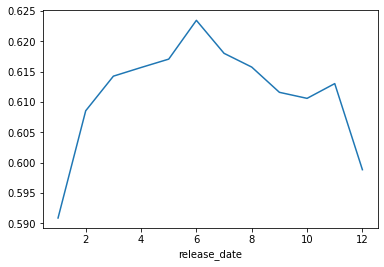

In [7]:
# Extract the months from the release_date column using its datetime accessor 
months = df['release_date'].dt.month

# Group the danceabilities by month
monthly_groupby = df['danceability'].groupby(months)

# Find the mean danceability by month
monthly_danceability = monthly_groupby.mean()

# Compute the result
monthly_danceability_result = monthly_danceability.compute()
monthly_danceability_result.plot()
import matplotlib.pyplot as plt
plt.show()

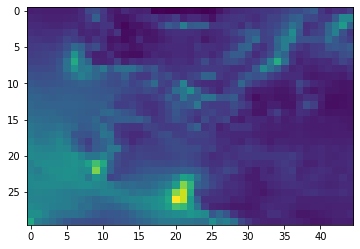

In [10]:

import h5py
import dask.array as da
import matplotlib.pyplot as plt

# Open the HDF5 dataset using h5py
hdf5_file = h5py.File('era_eu.hdf5', 'r')

# Load the file into a Dask array with a reasonable chunk size
precip = da.from_array(hdf5_file['/precip'], chunks=(12, 15, 15))

# Select only the months of January
january_rainfalls = precip[0::12]

# Calculate the mean rainfall in January for each location
january_mean_rainfall = january_rainfalls.mean(axis=0)

plt.imshow(january_mean_rainfall.compute())
plt.show()

In [11]:
hdf5_file['/precip']

<HDF5 dataset "precip": shape (508, 30, 45), type "<f4">

In [12]:
hdf5_file.keys()

<KeysViewHDF5 ['latitude', 'longitude', 'month', 'precip', 'temp', 'year']>

In [ ]:
# py -m pip install zarr

In [1]:
# Load the temperature data from the Zarr dataset
import dask.array as da
temps = da.from_zarr("./era_eu.zarr", component="temp")

# Print the Dask array of temperatures to see the chunk sizes
print(temps)

# Find the minimum of the mean monthly temperatures
all_time_low = temps.min()

# Compute the answer
all_time_low_value = all_time_low.compute()

print(all_time_low_value, "°C")

# %pip install zarr


dask.array<from-zarr, shape=(504, 30, 45), dtype=float32, chunksize=(12, 15, 15), chunktype=numpy.ndarray>
-23.37648 °C


In [2]:
%pip install xarray

  Obtaining dependency information for xarray from https://files.pythonhosted.org/packages/b5/36/1f4d4bc9be1957716ab93b8be8ea64df6b891ff3fc438f4964916fa6d714/xarray-2023.9.0-py3-none-any.whl.metadata
  Using cached xarray-2023.9.0-py3-none-any.whl.metadata (10 kB)
  Obtaining dependency information for pandas>=1.4 from https://files.pythonhosted.org/packages/ce/cd/a7c2cbffe2afff975349e60b14b63a448162145a7acac8ba12ddc2ed78a8/pandas-2.1.1-cp310-cp310-win_amd64.whl.metadata
  Using cached pandas-2.1.1-cp310-cp310-win_amd64.whl.metadata (18 kB)
Using cached xarray-2023.9.0-py3-none-any.whl (1.0 MB)
Using cached pandas-2.1.1-cp310-cp310-win_amd64.whl (10.7 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Note: you may need to restart the kernel to use updated packages.


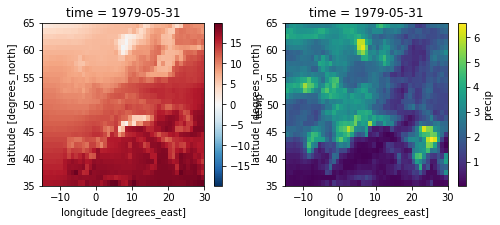

In [4]:
import xarray
import matplotlib.pyplot as plt
# Open the ERA5 dataset

ds = xarray.open_zarr('./era_eu.zarr')

# Select the zeroth time in the DataSet
ds_sel = ds.isel(time=0)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 3))

# Plot the zeroth temperature field on ax1
ds_sel['temp'].plot(ax=ax1)

# Plot the zeroth precipitation field on ax2
ds_sel['precip'].plot(ax=ax2)

plt.show()

In [6]:
ds

<xarray.Dataset>
Dimensions:  (lat: 30, lon: 45, time: 504)
Coordinates:
  * lat      (lat) float64 35.5 36.5 37.5 38.5 39.5 ... 60.5 61.5 62.5 63.5 64.5
  * lon      (lon) float64 -14.5 -13.5 -12.5 -11.5 -10.5 ... 26.5 27.5 28.5 29.5
  * time     (time) datetime64[ns] 1979-05-31 1979-06-30 ... 2021-04-30
Data variables:
    precip   (time, lat, lon) float32 dask.array<chunksize=(12, 15, 15), meta=np.ndarray>
    temp     (time, lat, lon) float32 dask.array<chunksize=(12, 15, 15), meta=np.ndarray>

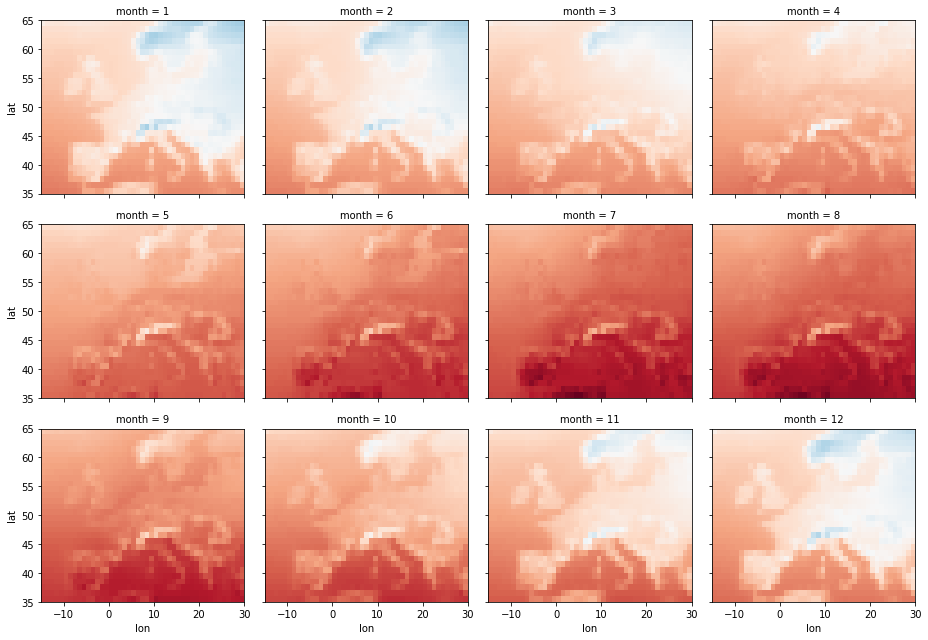

In [5]:
import matplotlib.pyplot as plt

# Extract the months from the time coordinates
months = ds['time'].dt.month

# Select the temp DataArray and group by months
monthly_groupby = ds['temp'].groupby(months)

# Find the mean temp by month
monthly_mean_temps = monthly_groupby.mean()

# Compute the result
monthly_mean_temps_computed = monthly_mean_temps.compute()

monthly_mean_temps_computed.plot(col='month', col_wrap=4, add_colorbar=False)
plt.show()

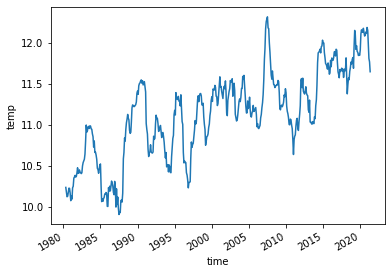

In [9]:
import xarray as xr
import matplotlib.pyplot as plt

ds = xr.open_zarr("./era_eu.zarr")

# Select the temperature dataset and take the latitude and longitude mean
temp_timeseries = ds['temp'].mean(dim=('lat', 'lon'))

# Calculate the 12 month rolling mean
temp_rolling_mean = temp_timeseries.rolling(time=12).mean()

# Plot the result
temp_rolling_mean.plot()
plt.show()

In [11]:
ds

<xarray.Dataset>
Dimensions:  (lat: 30, lon: 45, time: 504)
Coordinates:
  * lat      (lat) float64 35.5 36.5 37.5 38.5 39.5 ... 60.5 61.5 62.5 63.5 64.5
  * lon      (lon) float64 -14.5 -13.5 -12.5 -11.5 -10.5 ... 26.5 27.5 28.5 29.5
  * time     (time) datetime64[ns] 1979-05-31 1979-06-30 ... 2021-04-30
Data variables:
    precip   (time, lat, lon) float32 dask.array<chunksize=(12, 15, 15), meta=np.ndarray>
    temp     (time, lat, lon) float32 dask.array<chunksize=(12, 15, 15), meta=np.ndarray>